In [1]:
!pip install kagglehub[pandas-datasets]


In [27]:
# Install dependencies as needed:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# Set the path to the file you'd like to load
file_path = "PS_20174392719_1491204439457_log.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "ealaxi/paysim1",
  file_path,
)

print("First 5 records:", df.head())

<ipython-input-27-11a063736485>:11: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


First 5 records:    step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


Data Cleaning and EDA

In [28]:
data=df.copy()
#Creating copy

In [29]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [31]:
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [32]:
df.isna().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [33]:
df.describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [34]:
df["type"].unique()
df["type"].astype(str)
df["nameDest"].astype(str)


,nameDest
0,M1979787155
1,M2044282225
2,C553264065
3,C38997010
4,M1230701703
...,...
6362615,C776919290
6362616,C1881841831
6362617,C1365125890
6362618,C2080388513


In [35]:
print(df['type'].value_counts()  )
print(df['isFraud'].value_counts()  )


type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64
isFraud
0    6354407
1       8213
Name: count, dtype: int64


In [38]:
df.groupby("type")["isFraud"].sum()

,isFraud
type,
CASH_IN,0
CASH_OUT,4116
DEBIT,0
PAYMENT,0
TRANSFER,4097


- There are 6,355,620 transactions in total.

- Only 8,213 transactions are fraudulent (~0.13% fraud cases).

- The transaction types are CASH_OUT, PAYMENT, CASH_IN, TRANSFER, and DEBIT.

- The dataset is highly imbalanced (very few fraud cases)

- All fraud cases occur only in CASH_OUT and TRANSFER

In [40]:
df_fraud = df[df["type"].isin(["CASH_OUT", "TRANSFER"])]
df_fraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [41]:
df_fraud["type"].value_counts()

,count
type,
CASH_OUT,2237500
TRANSFER,532909


In [42]:
df_fraud.groupby("type")["isFraud"].sum()

,isFraud
type,
CASH_OUT,4116
TRANSFER,4097


In [43]:
fraud_rate = (df_fraud.groupby("type")["isFraud"].sum() / df_fraud["type"].value_counts()) * 100
print(fraud_rate)


type
CASH_OUT    0.183955
TRANSFER    0.768799
dtype: float64


- Fraud is almost 4 times more likely in TRANSFER transactions than in CASH_OUT!



In [46]:
df_fraud.groupby("isFraud")["amount"].describe()

,count,mean,std,min,25%,50%,75%,max
isFraud,,,,,,,,
0,2762196.0,3.141155e+05,8.771441e+05,0.01,82908.2325,171034.46,305994.185,92445516.64
1,8213.0,1.467967e+06,2.404253e+06,0.00,127091.3300,441423.44,1517771.480,10000000.00


- Fraud transactions have a much higher average amount
- Fraud transactions have a much wider range, Max : 10000000.00 , Min: 127091.3300
- Non-Fraud Max: ₹92M
- 25% of fraud transactions are above ₹127K.

- 50% (median) fraud amount is ₹441K.

- 75% of fraud transactions are above ₹1.5M!


In [48]:
df_fraud.groupby("isFraud")["oldbalanceOrg"].describe()

,count,mean,std,min,25%,50%,75%,max
isFraud,,,,,,,,
0,2762196.0,4.287969e+04,1.352009e+05,0.0,0.00,283.00,30790.00,43818855.30
1,8213.0,1.649668e+06,3.547719e+06,0.0,125822.44,438983.45,1517771.48,59585040.37


In [49]:
df_fraud[df_fraud["isFraud"] == 1]["oldbalanceOrg"].value_counts().head(10)


,count
oldbalanceOrg,
10000000.00,142
0.00,41
429257.45,4
1165187.89,4
1048.63,2
1146381.44,2
468599.79,2
29611.08,2
11424.36,2


- 10Mil is the most frequent Starting Balance
- Zero balance is present in 41 cases of the Fraud Transaction
- Fraudsters often use large, round numbers (like ₹10M) or ₹0 before making fraudulent transactions.



In [50]:
df_fraud[df_fraud["isFraud"] == 1]["newbalanceOrig"].value_counts().head(10)

,count
newbalanceOrig,
0.00,8053
10399045.08,3
17316255.05,3
19585040.37,3
1343002.08,2
5674547.89,2
536624.41,2
353874.22,2
3576297.10,2


- 8053 fraud cases resulted in a ₹0 balance after the transaction.

- Fraudsters often drain accounts completely after making a fraudulent transaction. This suggests that fraud might involve:

  - Fake accounts that start with a large balance (e.g., ₹10M).

  - Draining the account to ₹0 in a single fraudulent transaction

---



- Fraud happens only in CASH_OUT and TRANSFER.
-  TRANSFER transactions have a 4x higher fraud rate than CASH_OUT.
- Fraud transactions involve much higher amounts (₹1.46M avg vs ₹0.31M for normal).
- Fraudsters often start with ₹10M or ₹0 in their account.
- In 98% of fraud cases, the sender’s balance is fully drained (₹0 left).



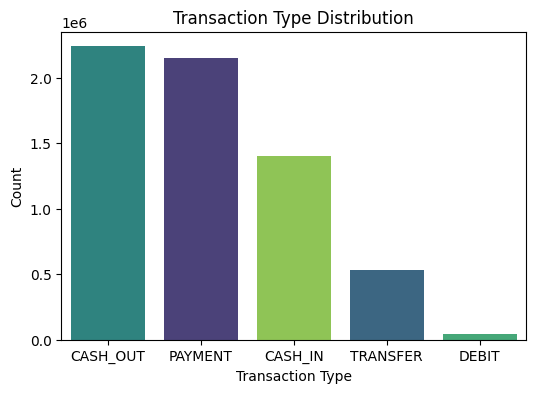

In [63]:
plt.figure(figsize=(6,4))
sns.countplot(x=df["type"], order=df["type"].value_counts().index, palette="viridis",hue=df["type"])
plt.title("Transaction Type Distribution")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()


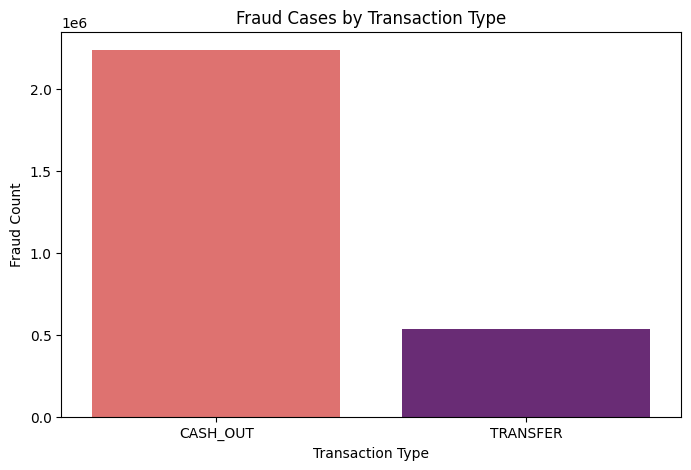

In [58]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df_fraud["type"], order=df_fraud["type"].value_counts().index, palette="magma",hue=df_fraud["type"])
plt.title("Fraud Cases by Transaction Type")
plt.xlabel("Transaction Type")
plt.ylabel("Fraud Count")
plt.show()


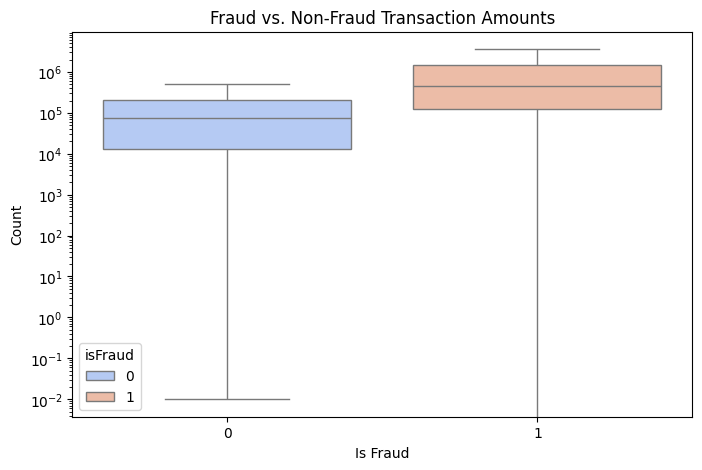

In [61]:
#Fraud vs. Non-Fraud Transaction Amounts
plt.figure(figsize=(8,5))
sns.boxplot(x="isFraud", y="amount", data=df, showfliers=False, palette="coolwarm",hue="isFraud")
plt.yscale("log")
plt.title("Fraud vs. Non-Fraud Transaction Amounts")
plt.xlabel("Is Fraud")
plt.ylabel("Count")
plt.show()

In [64]:
df.step.unique()

#In this case 1 step is 1 hour of time.

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

<ipython-input-68-6607ebee5894>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fraud["hour"]=df_fraud["step"]%24


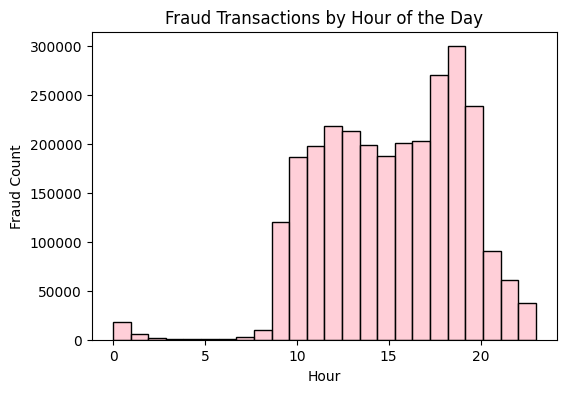

In [68]:
#Fraud Transactions Over Time
df_fraud["hour"]=df_fraud["step"]%24
plt.figure(figsize=(6,4))
sns.histplot(df_fraud["hour"], bins=24, color="pink")
plt.title("Fraud Transactions by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Fraud Count")
plt.show()


- Most of the fraud transactions take place during working-hours
- Fraud transactions are usually higher in amount
-

In [70]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'hour'],
      dtype='object')

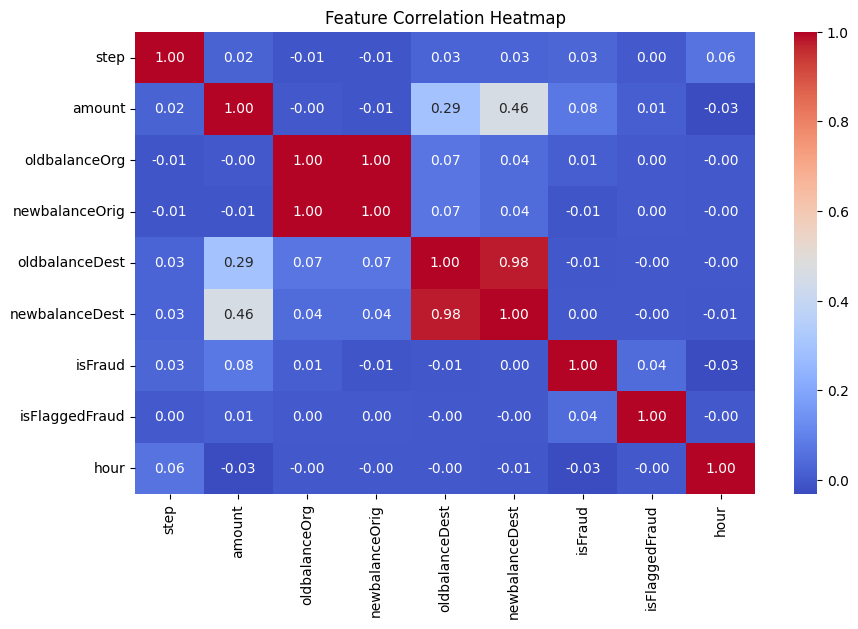

In [72]:
plt.figure(figsize=(10, 6))
dfcorr=df[['step',  'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud',"hour"]]
sns.heatmap(dfcorr.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


- oldbalanceOrg and newbalanceOrig have a high correlation, meaning that the sender's initial and final balances are strongly related.


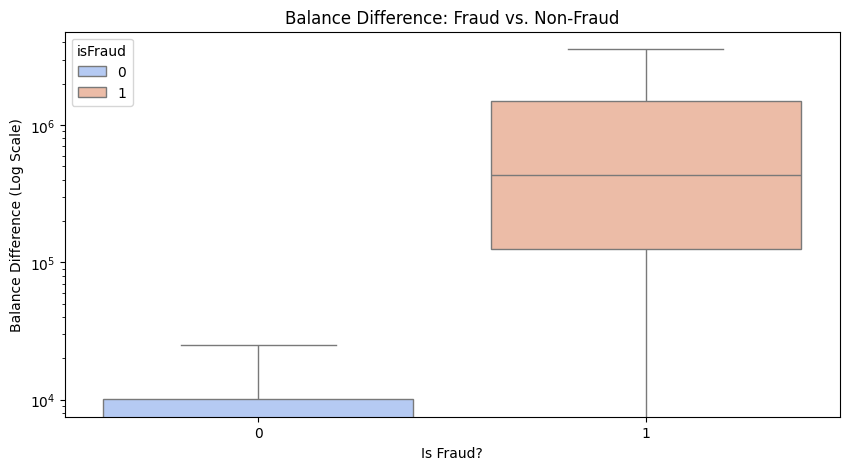

In [74]:
df["balance_diff"] = df["oldbalanceOrg"] - df["newbalanceOrig"]

plt.figure(figsize=(10, 5))
sns.boxplot(x="isFraud", y="balance_diff", data=df, showfliers=False, palette="coolwarm",hue="isFraud")
plt.yscale("log")  # Log scale for better visualization
plt.title("Balance Difference: Fraud vs. Non-Fraud")
plt.xlabel("Is Fraud?")
plt.ylabel("Balance Difference (Log Scale)")
plt.show()


- Fraud cases have a high balance difference(mostly because they are drained of the money after the fraud)
Final EDA Insight: Balance Difference as a Fraud Indicator
- Real transactions often leave some balance behind.
- Fraud transactions almost always drop the balance to ₹0.
-  High balance difference could be a strong fraud detection feature in an ML model.

